In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [22]:
df = pd.read_csv("cardekho_data.csv")

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [25]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [26]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

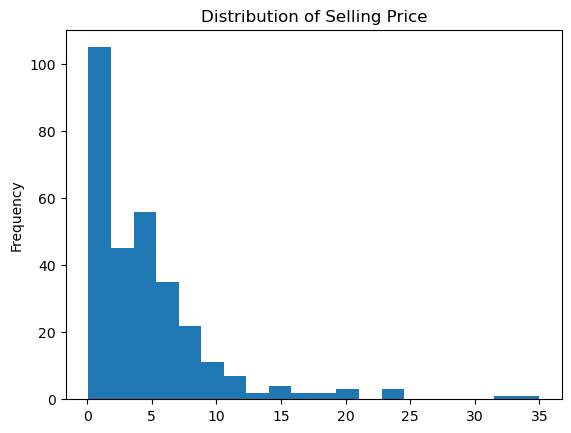

In [29]:
df["Selling_Price"].plot(kind = "hist" , bins = 20, title = "Distribution of Selling Price")
plt.show()

In [30]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
fuel_type_avg_price = df.groupby("Fuel_Type")["Selling_Price"].mean()
fuel_type_avg_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

Text(0, 0.5, 'Average Selling\xa0Price')

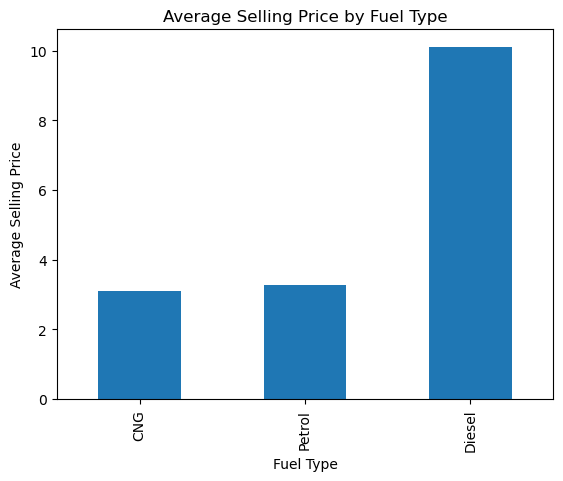

In [36]:
fuel_type_avg_price.sort_values(ascending = True).plot(kind = "bar", title = "Average Selling Price by Fuel Type") 
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")

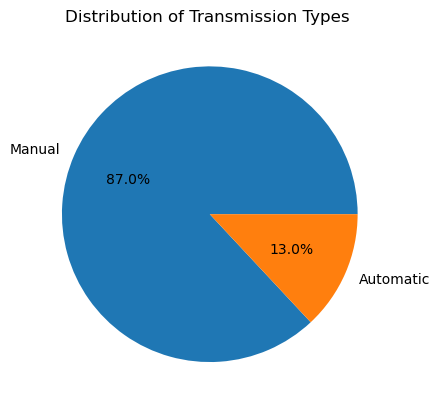

In [45]:
transmission_counts = df["Transmission"].value_counts()
transmission_counts.plot(kind = "pie", autopct = "%1.1f%%", title = "Distribution of Transmission Types ")
plt.ylabel("")
plt.show()

In [46]:
seller_type_total_present_price = df.groupby("Seller_Type")["Present_Price"].sum()

In [47]:
seller_type_total_present_price

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [49]:
yearly_avg_kms_driven = df.groupby("Year")["Kms_Driven"].mean()

In [51]:
yearly_avg_kms_driven.sort_values(ascending = False)

Year
2004    135154.000000
2008    112128.571429
2005    104294.000000
2003     94500.000000
2006     87422.250000
2009     67820.500000
2010     60014.066667
2007     51000.000000
2012     43798.217391
2013     41534.333333
2011     40327.368421
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64

In [53]:
fuel_trans_max_selling_price = df.groupby(["Fuel_Type", "Transmission"])["Selling_Price"].max()

In [55]:
fuel_trans_max_selling_price.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


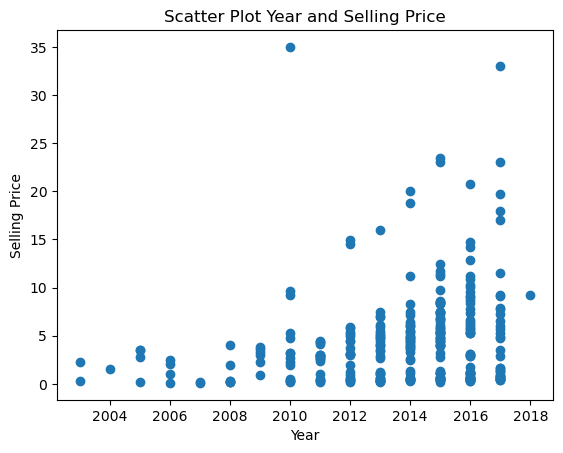

In [56]:
plt.scatter(df ["Year"], df ["Selling_Price"])
plt.title("Scatter Plot Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

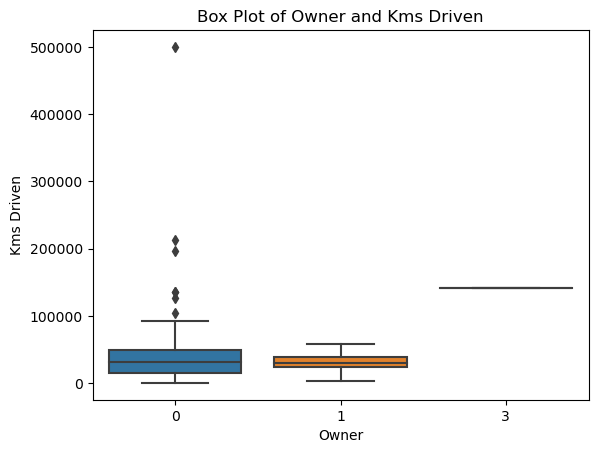

In [57]:
sns.boxplot(x="Owner", y="Kms_Driven", data = df)
plt.title("Box Plot of Owner and Kms Driven")
plt.xlabel("Owner")
plt.ylabel("Kms Driven")
plt.show()


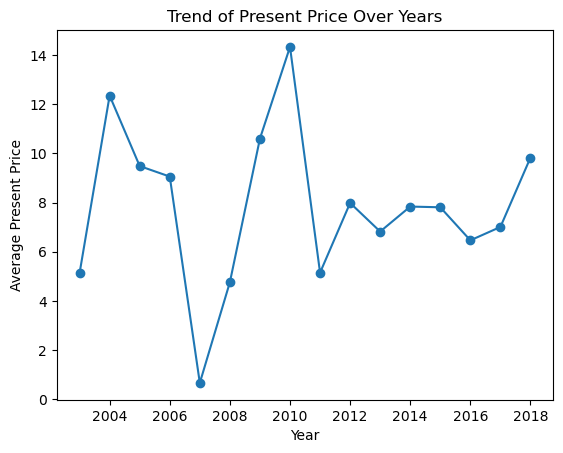

In [58]:
plt.plot(df.groupby("Year") ["Present_Price"].mean(), marker = "o")
plt.title("Trend of Present Price Over Years")
plt.xlabel("Year")
plt.ylabel("Average Present Price")
plt.show()

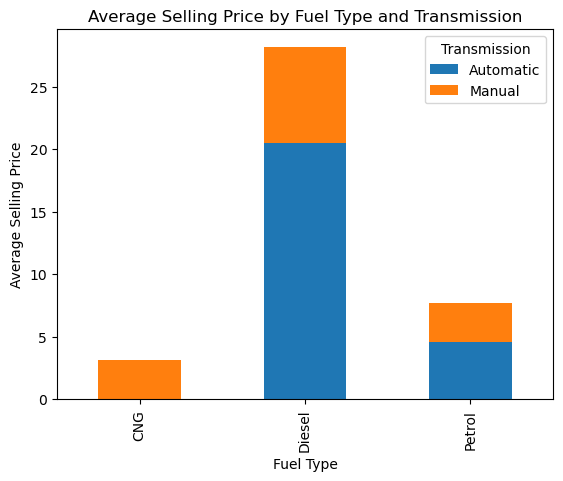

In [60]:
df.groupby(["Fuel_Type", "Transmission"])["Selling_Price"].mean().unstack().plot(kind = "bar", stacked = True)
plt.title("Average Selling Price by Fuel Type and Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

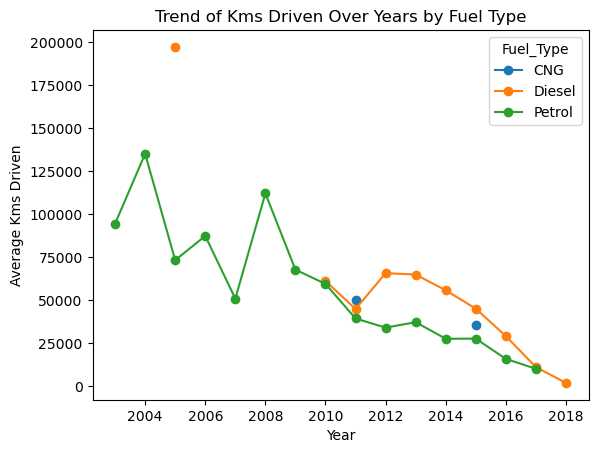

In [62]:
df.groupby(["Year", "Fuel_Type"]) ["Kms_Driven"].mean().unstack().plot(kind = "line", marker = "o")
plt.title("Trend of Kms Driven Over Years by Fuel Type")
plt.xlabel("Year")
plt.ylabel("Average Kms Driven")
plt.show()

In [63]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [65]:
Y = df["Selling_Price"]

In [68]:
X = df[["Year", "Kms_Driven", "Fuel_Type", "Transmission", "Owner"]]

In [69]:
labelencoder = preprocessing.LabelEncoder()

In [70]:
X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
X["Transmission"] = labelencoder.fit_transform(X["Transmission"])

C:\Users\nawaz\AppData\Local\Temp\ipykernel_2248\1425814995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
C:\Users\nawaz\AppData\Local\Temp\ipykernel_2248\1425814995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"] = labelencoder.fit_transform(X["Transmission"])


In [71]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
...,...,...,...,...,...
296,2016,33988,1,1,0
297,2015,60000,2,1,0
298,2009,87934,2,1,0
299,2017,9000,1,1,0


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [80]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [84]:
def modelresults(predictions):
    print("Mean absolute error is {}".format(mean_absolute_error(Y_test, predictions)))
    print("Root Mean Sqared Error is {}".format(np.sqrt(mean_squared_error(Y_test, predictions))))

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(scaled_X_train, Y_train)

LinearRegression()

In [93]:
predslr = lr.predict(scaled_X_test)

In [94]:
modelresults(predslr)

Mean absolute error is 2.7628906828357924
Root Mean Sqared Error is 3.7204139236942133


In [95]:
r2_score(Y_test, predslr)

0.39551778807580185

In [101]:
svrmodel = SVR()
param_gridsvr = {"C": [0.1,0.5], "kernel": ["linear", "rbf","poly"], "degree": [2,2,4]}

In [102]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [104]:
gridsvr.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 2, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [105]:
gridsvr.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [106]:
predsgridsvr = gridsvr.predict(scaled_X_test)
modelresults(predsgridsvr)

Mean absolute error is 2.6908713471998977
Root Mean Sqared Error is 3.9177468109483073


In [118]:
rfrmodel = RandomForestRegressor()
param_gridrfr = {"max_depth": [5,10], "n_estimators" : [2,5,8]}
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [119]:
gridrfr.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [120]:
gridrfr.best_params_

{'max_depth': 10, 'n_estimators': 5}

In [125]:
predsgridrfr = gridrfr.predict(scaled_X_test)
modelresults(predsgridrfr)

Mean absolute error is 2.891411453762287
Root Mean Sqared Error is 4.798399391245557
